In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

In [2]:
plt.style.use('fivethirtyeight')

In [5]:
df = web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2021-03-01')

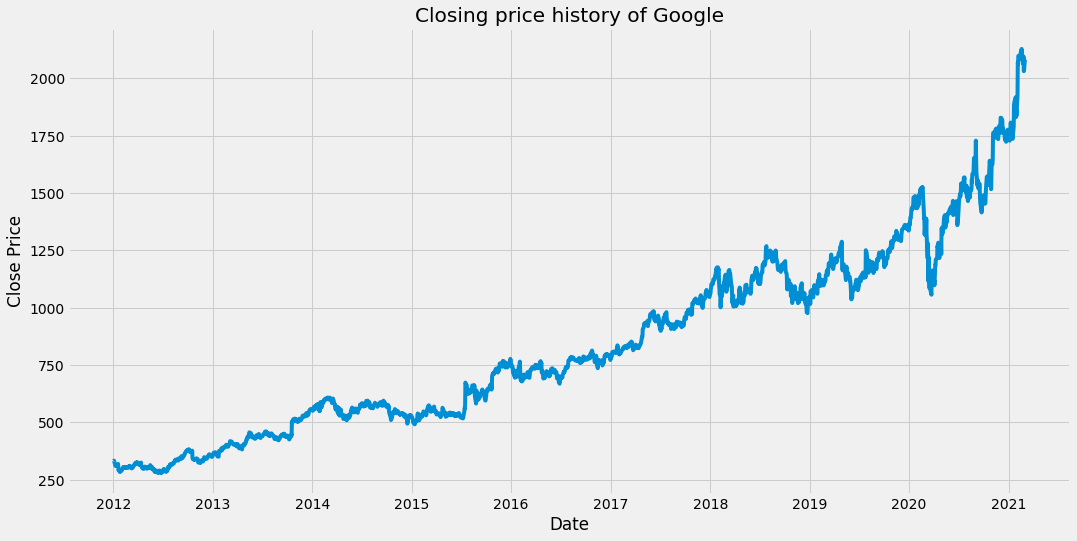

In [6]:
# Vizualize closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history of Google')
plt.plot(df['Close'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

In [7]:
# Create a new dataframe with only column and convet it to a numpy array
dataset = df.filter(['Close']).values
train_set = dataset[:round(dataset.shape[0]*0.8)]
test_set = dataset[round(dataset.shape[0]*0.8):]
#print(train_set.shape)

In [8]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train_set)
test_sc = scaler.fit_transform(test_set)

In [9]:
#Split the train data into xtrain and ytrain:
#Independant variables
X_train = []
#Dependant variables
y_train = []

In [10]:
# xtrain contain 15 values, which are use for prediction
# y train contain the first value after 15, which is the value that we want to predict
for i in range(15, len(train_sc)):
    # appending the 15 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_train.append(train_sc[i-15:i, 0])
    # appending the 15th stock price to the list for i
    y_train.append(train_sc[i, 0])

In [11]:
#Split the test data into xtrain and ytrain:
#Independant variables
X_test = []
#Dependant variables
y_test = []

In [12]:
# xtrain contain 15 values, which are use for prediction
# y train contain the first value after 15, which is the value that we want to predict
for i in range(15, len(test_sc)):
    # appending the 15 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_test.append(test_sc[i-15:i, 0])
    # appending the 15th stock price to the list for i
    y_test.append(test_sc[i, 0])

In [13]:
# transforming pandas lists to numpy arrays required for the RNN
X_test, y_test = np.array(X_test), np.array(y_test)

In [14]:
# Shaping/adding new dimensions to allow adding more indicators: from 2D to 3D
# 3 input arguments
# batch_size: number of observations
# timesteps: number of columns
# input_dim: number of predictors
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

In [15]:
# transforming pandas lists to numpy arrays required for the RNN
X_train, y_train = np.array(X_train), np.array(y_train)
#print(X_train[0])
#print(X_train.shape)

In [16]:
# Shaping/adding new dimensions to allow adding more indicators: from 2D to 3D
# 3 input arguments
# batch_size: number of observations
# timesteps: number of columns
# input_dim: number of predictors
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
#print(X_train[0])
print(X_train.shape)

(1828, 15, 1)


In [17]:
#--------------------- Building RNN/LSTM model --------------------#
#Initializing the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# independent variable is a sequence of layers: regression and no classification given the continuous output value
regressor = Sequential()
#------------------------------------------------------------------#
# Adding the first LSTM layer
#------------------------------------------------------------------#

In [18]:
# 3 inputs
# number of memory/LSTM units or neurons in each LSTM
# binary vb to indicate whether there will be further layers of LSTM added to teh model
# input shape (automatically takes teh first dimension so the reamining only needs to be specified)
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

In [19]:
#------------------------------------------------------------------#
# Adding the second LSTM layer
#------------------------------------------------------------------#
# no input shape needed given that that is specified in the previous layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [20]:
#------------------------------------------------------------------#
# Adding the third LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
#------------------------------------------------------------------#
# Adding the forth LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [22]:
#------------------------------------------------------------------#
# Adding the fifth LSTM layer
#------------------------------------------------------------------#
# note that this is the final LSTM layer, hence we change the binary argument to False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
#------------------------------------------------------------------#
# Adding output layer to the RNN to make a fully connected NN
#------------------------------------------------------------------#
# one dimensional real output
regressor.add(Dense(units = 1))

In [24]:
#--------------------- Compiling the RNN model --------------------#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
#--------------------- Training RNN model --------------------#
#connecting the built regressor to the training model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
58/58 [==============================] - 5s 13ms/step - loss: 0.0823
Epoch 2/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 3/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 4/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0027
Epoch 5/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0037
Epoch 6/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 7/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 8/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 9/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 10/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 11/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 12/20
58/58 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 13/20
58/58 [==================

In [26]:
#--------------------- Testing RNN model --------------------#
y_pred = regressor.predict(X_test)

In [27]:
print(mae(y_test,y_pred))

0.05329704860434344
